In [77]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE



# Read the data

In [10]:
df = pd.read_csv("Data_Cortex_Nuclear.csv",encoding = "ISO-8859-1")

In [12]:
df = df.iloc[:,1:-4]

In [13]:
df

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,0.275547,0.190483,NaN,0.115806,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823
1076,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,0.283207,0.190463,NaN,0.113614,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478
1077,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,0.290843,0.216682,NaN,0.118948,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825
1078,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,...,0.306701,0.222263,NaN,0.125295,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031


# PCA dimension reduction and visualization of the data

## 2 dimensions

In [40]:
pca_2dim = PCA(n_components=2)

In [41]:
df.isna().sum()

DYRK1A_N       3
ITSN1_N        3
BDNF_N         3
NR1_N          3
NR2A_N         3
            ... 
SYP_N          0
H3AcK18_N    180
EGR1_N       210
H3MeK4_N     270
CaNA_N         0
Length: 77, dtype: int64

In [42]:
mean_imputer = SimpleImputer(strategy='mean')

In [43]:
df_imputed_mean = mean_imputer.fit_transform(df)

In [45]:
df_pca_2dim = pca_2dim.fit_transform(df_imputed_mean)

In [46]:
df_pca_2dim

array([[ 1.33783565,  2.74036117],
       [ 0.92347474,  2.50339481],
       [ 0.894646  ,  2.51039517],
       ...,
       [-2.80183078, -0.74375694],
       [-2.51784238, -0.66635383],
       [-1.97329921, -0.5398095 ]])

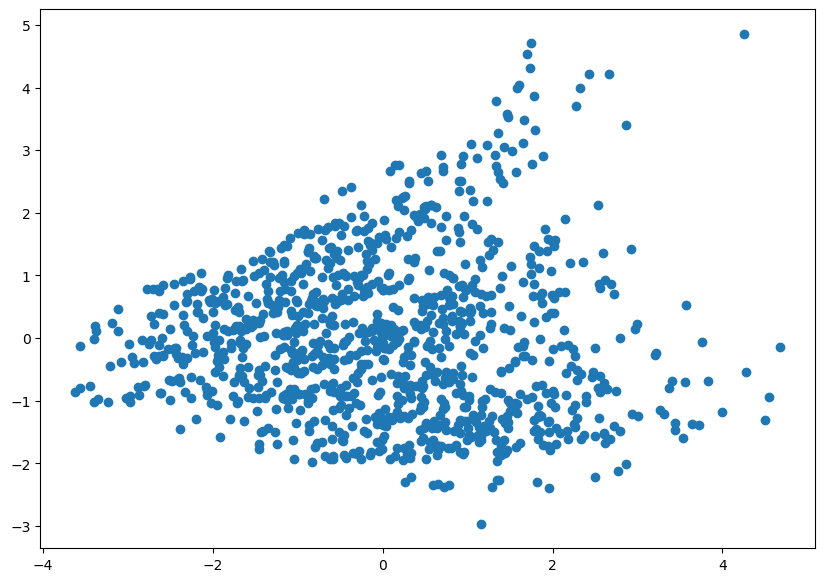

In [47]:
plt.figure(figsize=(10, 7))
plt.scatter(df_pca_2dim[:,0],df_pca_2dim[:,1])

## 3 dimensions

In [48]:
pca_3dim = PCA(n_components=3)

In [49]:
df_pca_3dim = pca_3dim.fit_transform(df_imputed_mean)

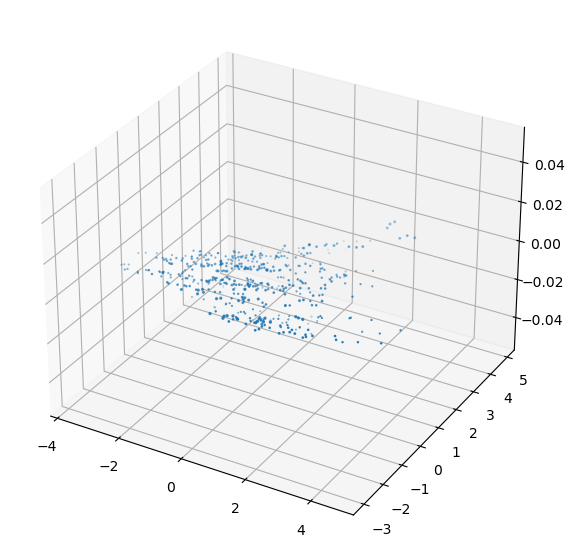

In [51]:
plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
plt.scatter(df_pca_3dim[:,0],df_pca_3dim[:,1],df_pca_3dim[:,2])

# Clustering

Da go eliminirame "curse of dimensionality" i da zashtedime procesirachko vreme ubavo e da ja namalime dimenzionalnosta na podatocite pred da izvrshime klasteriranje.

In [78]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df_imputed_mean)

## K-means


c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


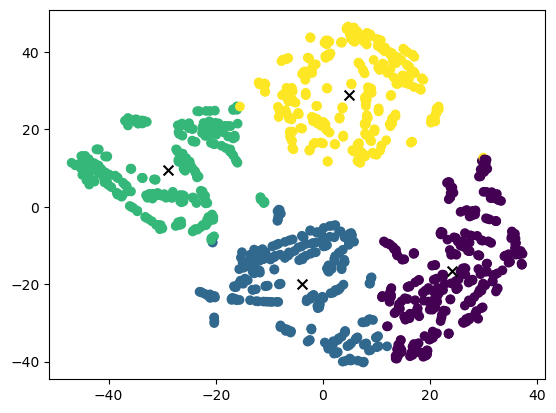

In [134]:
estimator = KMeans(init='random', n_clusters=4, random_state=1, n_init=1, max_iter=70)
y_pred = estimator.fit_predict(X_tsne) 

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred)
plt.scatter(estimator.cluster_centers_[:,0],estimator.cluster_centers_[:,1], s=50, marker='x', color="black")

## DBSCAN

In [131]:
dbscan_cluster1 = DBSCAN(eps=0.1, min_samples=1)
dbscan_cluster1.fit(X_tsne)

DBSCAN(eps=0.1, min_samples=1)

Text(0, 0.5, '$x_2$')

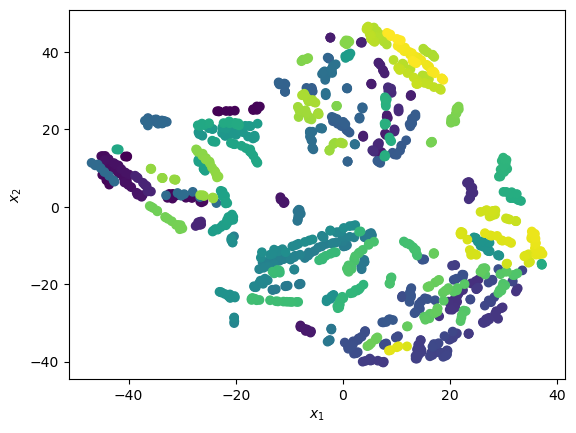

In [132]:
plt.scatter(X_tsne[:, 0], 
            X_tsne[:, 1], 
            c=dbscan_cluster1.labels_)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

Dvata algoritmi davaat sosema razlichni rezultati.